<a href="https://colab.research.google.com/github/shyoon-03/SampleRepo/blob/main/2015~2023%20%EC%A7%80%EC%97%AD%EB%B3%84%20%EC%B6%9C%EC%82%B0%EC%9C%A8%EA%B3%BC%20%EC%A0%84%EC%84%B8%EA%B0%80%EC%9D%98%20%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab에서 Pandas를 가속하는 방법을 자세히 알아보려면 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb">10분 가이드</a> 또는 <a href="https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb">미국 주식 시장 데이터 분석 데모</a>를 참고하세요.

Saving 출산율_전세가_인구수_병합데이터.csv to 출산율_전세가_인구수_병합데이터.csv
📊 지역별 전세가격과 출산율의 상관관계 분석 결과:
    지역   상관계수  p-value
13  전남 -0.955  0.00006
12  전북 -0.941  0.00016
9   강원 -0.936  0.00020
0   서울 -0.912  0.00062
10  충북 -0.877  0.00188
3   인천 -0.864  0.00266
1   부산 -0.861  0.00286
16  제주 -0.851  0.00359
11  충남 -0.842  0.00439
4   광주 -0.828  0.00581
7   세종 -0.827  0.00594
8   경기 -0.803  0.00922
5   대전 -0.802  0.00925
2   대구 -0.800  0.00970
14  경북 -0.795  0.01051
6   울산 -0.693  0.03864
15  경남 -0.648  0.05916

⚠️ 통계적으로 유의하지 않은 지역 (p >= 0.05):
    지역   상관계수  p-value
15  경남 -0.648  0.05916


<ipython-input-1-212e5aa736c5>:50: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-212e5aa736c5>:50: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-212e5aa736c5>:50: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-212e5aa736c5>:50: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-212e5aa736c5>:50: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-212e5aa736c5>:50: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-1-212e5aa736c5>:50: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inp

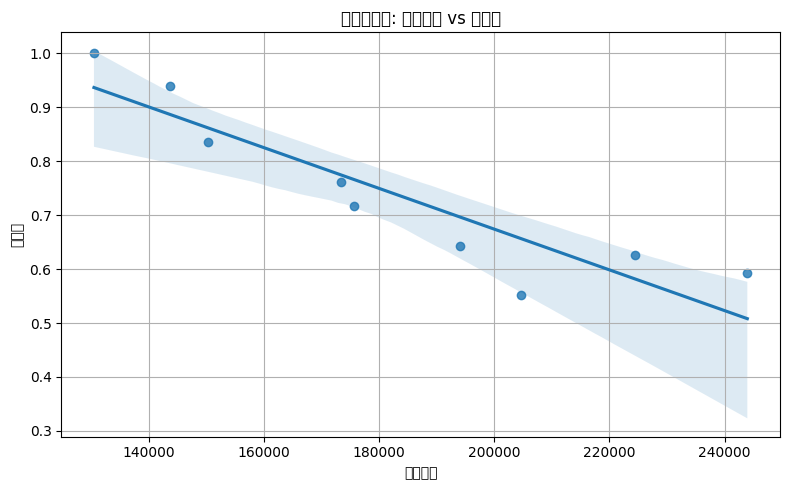

In [1]:
# 📌 1. 필요한 라이브러리 설치 및 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# 📌 2. 파일 업로드 (Google Colab용)
from google.colab import files
uploaded = files.upload()

# 업로드한 파일을 읽어오기 (한글 파일인 경우 cp949 인코딩 사용)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, encoding='cp949')

# 📌 3. 지역별 상관계수와 p-value 계산 함수
def region_correlation(region_df):
    region_name = region_df["지역"].iloc[0]
    corr, pval = pearsonr(region_df["전세가격"], region_df["출산율"])
    return {
        "지역": region_name,
        "상관계수": round(corr, 3),
        "p-value": round(pval, 5)
    }

# 📌 4. 모든 지역에 대해 계산
results = [region_correlation(df[df["지역"] == region]) for region in df["지역"].unique()]
correlation_df = pd.DataFrame(results).sort_values("p-value")

# 📌 5. 결과 출력
print("📊 지역별 전세가격과 출산율의 상관관계 분석 결과:")
print(correlation_df)

# 📌 6. p-value >= 0.05 인 지역만 필터링
not_significant = correlation_df[correlation_df["p-value"] >= 0.05]
if not not_significant.empty:
    print("\n⚠️ 통계적으로 유의하지 않은 지역 (p >= 0.05):")
    print(not_significant)
else:
    print("\n✅ 모든 지역에서 통계적으로 유의한 상관관계가 관찰됨 (p < 0.05)")

# 📌 7. 선택적으로 시각화하고 싶을 경우 예시
# 서울의 출산율 vs 전세가격 산점도 + 회귀선
seoul = df[df["지역"] == "서울"]
plt.figure(figsize=(8, 5))
sns.regplot(data=seoul, x="전세가격", y="출산율", marker='o')
plt.title("서울특별시: 전세가격 vs 출산율")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-2-30bd85dd711a>:25: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-2-30bd85dd711a>:25: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-2-30bd85dd711a>:25: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-2-30bd85dd711a>:25: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-2-30bd85dd711a>:25: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-2-30bd85dd711a>:25: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-2-30bd85dd711a>:25

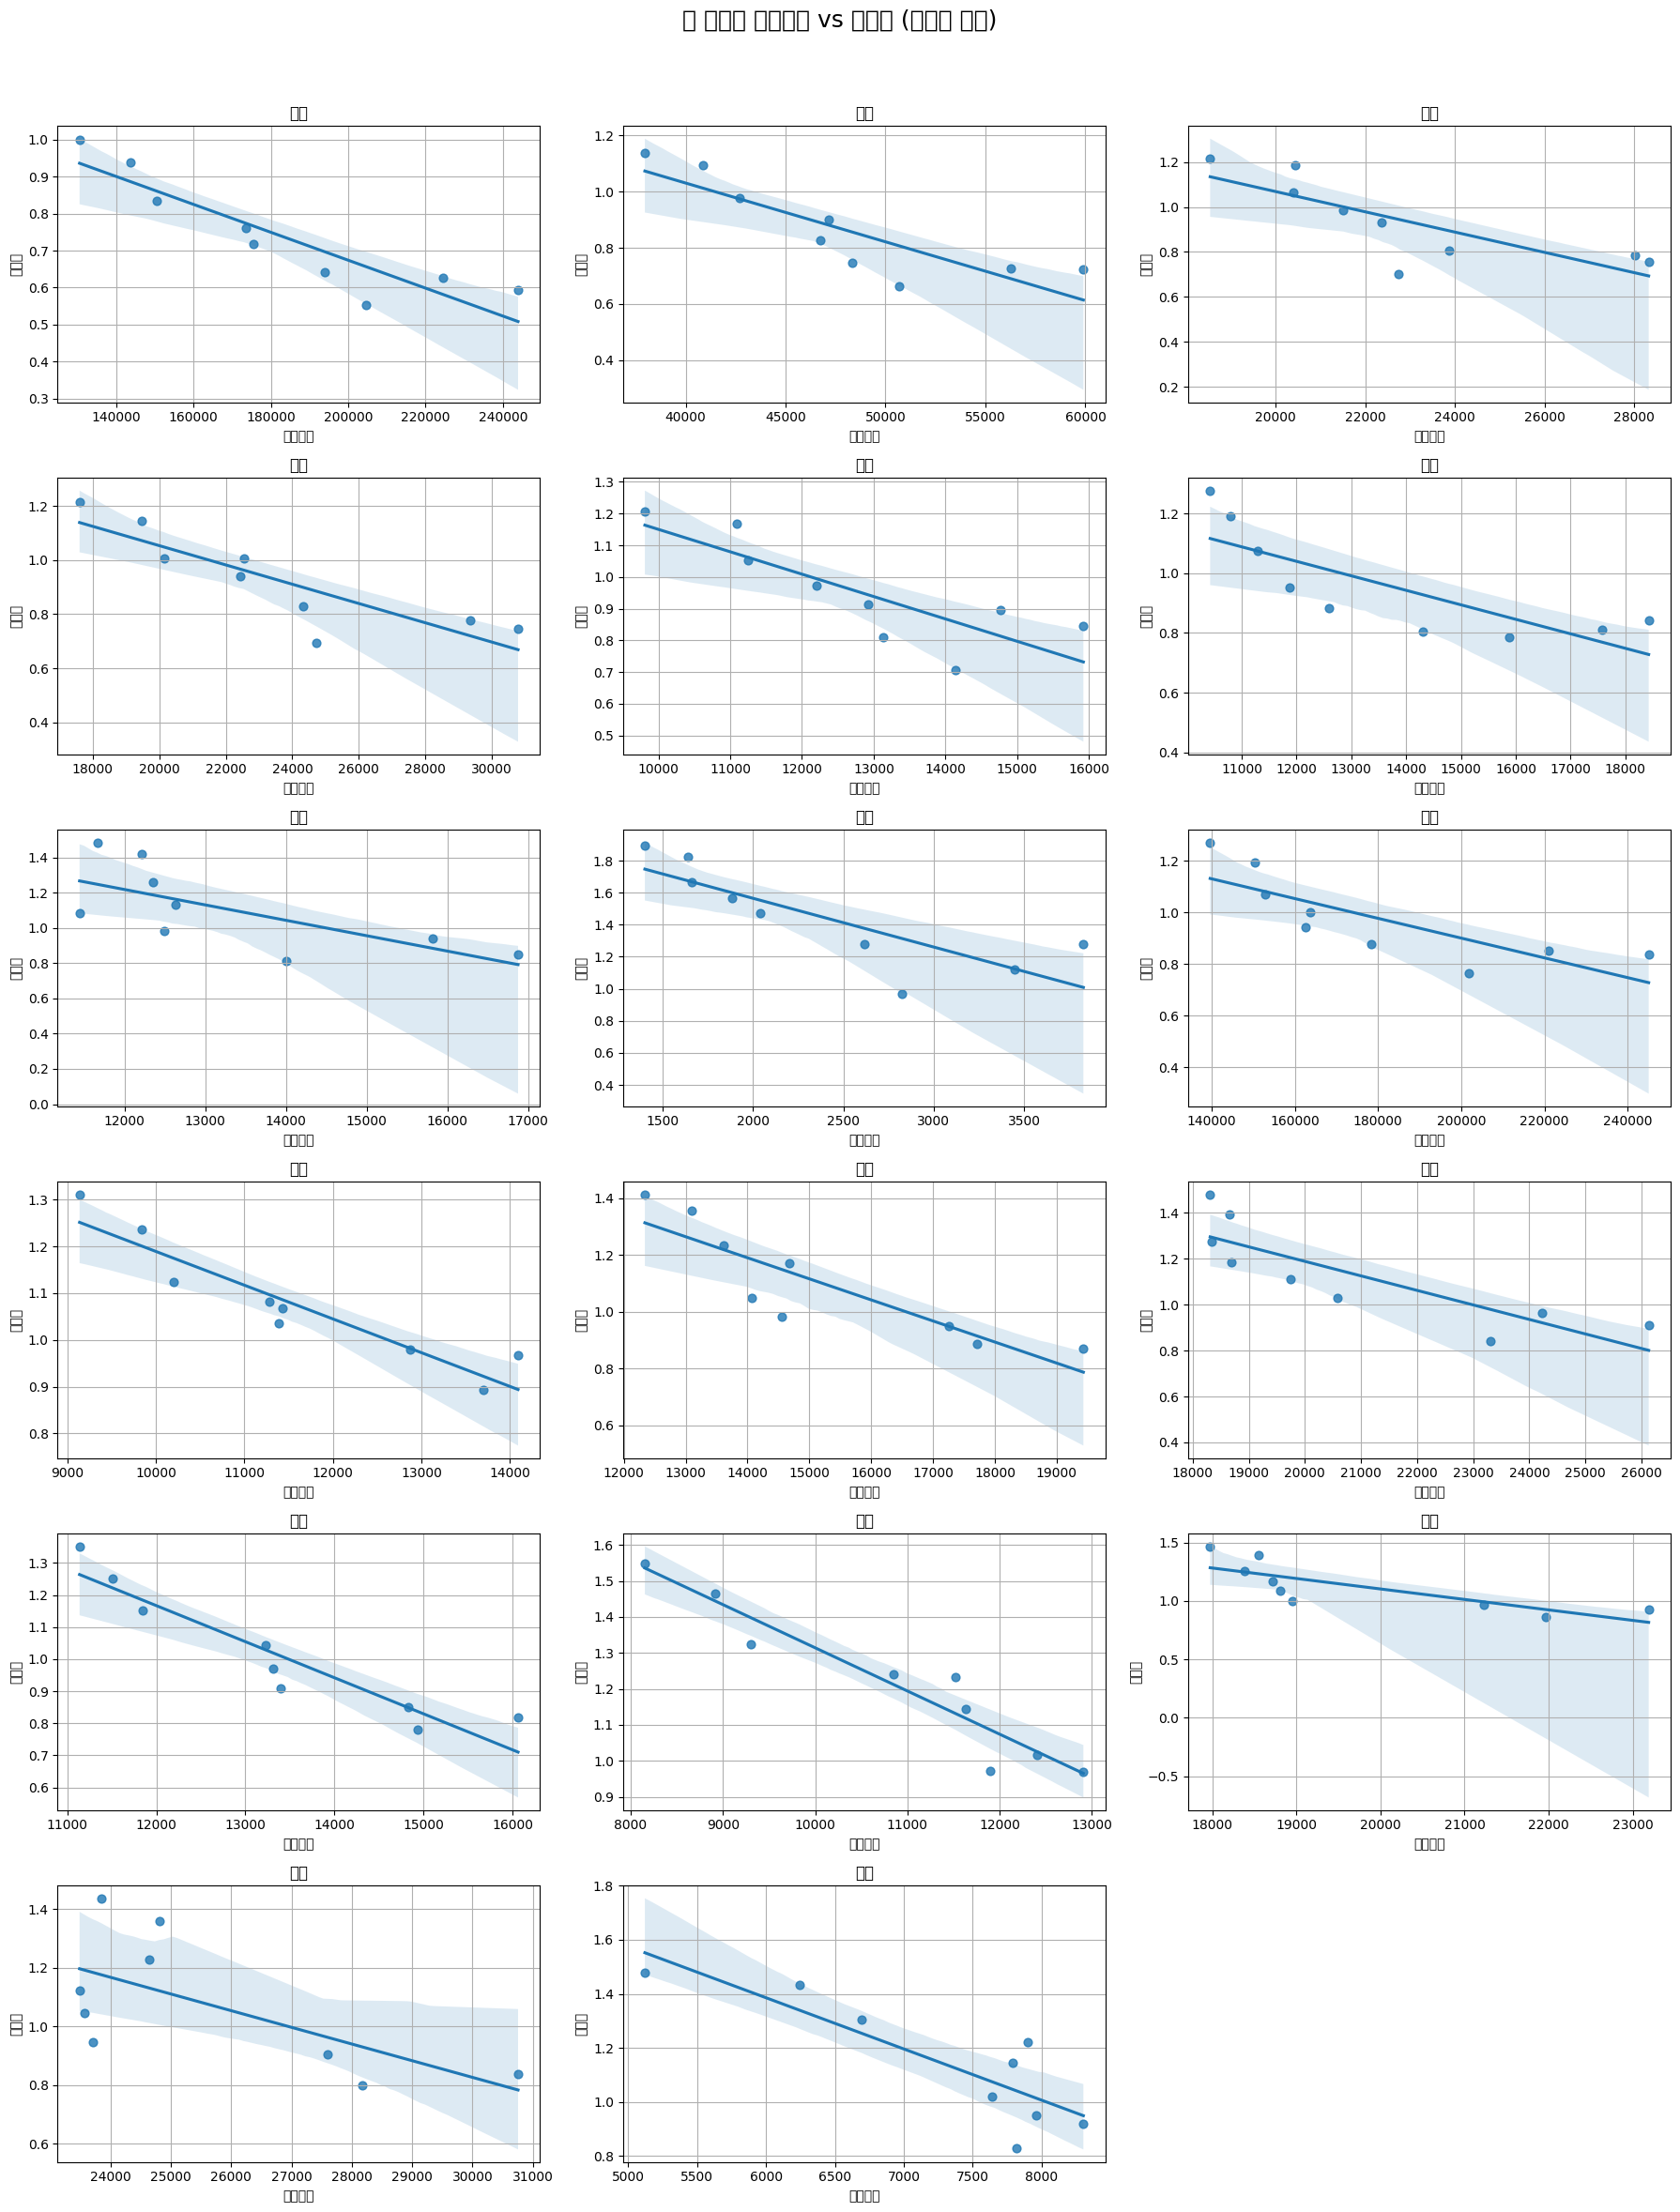

In [2]:
# 📌 지역별 전세가 vs 출산율 회귀선 포함 산점도 그리기
regions = df["지역"].unique()
ncols = 3
nrows = -(-len(regions) // ncols)  # 올림 나눗셈

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
fig.suptitle("📈 지역별 전세가격 vs 출산율 (회귀선 포함)", fontsize=18)

for idx, region in enumerate(regions):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]

    subset = df[df["지역"] == region]
    sns.regplot(data=subset, x="전세가격", y="출산율", ax=ax, scatter_kws={"s": 40})
    ax.set_title(region)
    ax.set_xlabel("전세가격")
    ax.set_ylabel("출산율")
    ax.grid(True)

# 나머지 안 쓰는 subplot 빈칸 제거
for i in range(len(regions), ncols * nrows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Saving 출산율_전세가_인구수_병합데이터.csv to 출산율_전세가_인구수_병합데이터 (1).csv
📊 지역별 전세가격과 출산율의 상관관계 분석 결과:
    지역   상관계수  p-value
13  전남 -0.955  0.00006
12  전북 -0.941  0.00016
9   강원 -0.936  0.00020
0   서울 -0.912  0.00062
10  충북 -0.877  0.00188
3   인천 -0.864  0.00266
1   부산 -0.861  0.00286
16  제주 -0.851  0.00359
11  충남 -0.842  0.00439
4   광주 -0.828  0.00581
7   세종 -0.827  0.00594
8   경기 -0.803  0.00922
5   대전 -0.802  0.00925
2   대구 -0.800  0.00970
14  경북 -0.795  0.01051
6   울산 -0.693  0.03864
15  경남 -0.648  0.05916

⚠️ 통계적으로 유의하지 않은 지역 (p >= 0.05):
    지역   상관계수  p-value
15  경남 -0.648  0.05916


<ipython-input-3-3dee4deac123>:72: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-3-3dee4deac123>:72: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-3-3dee4deac123>:72: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-3-3dee4deac123>:72: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-3-3dee4deac123>:72: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-3-3dee4deac123>:72: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-3-3dee4deac123>:72

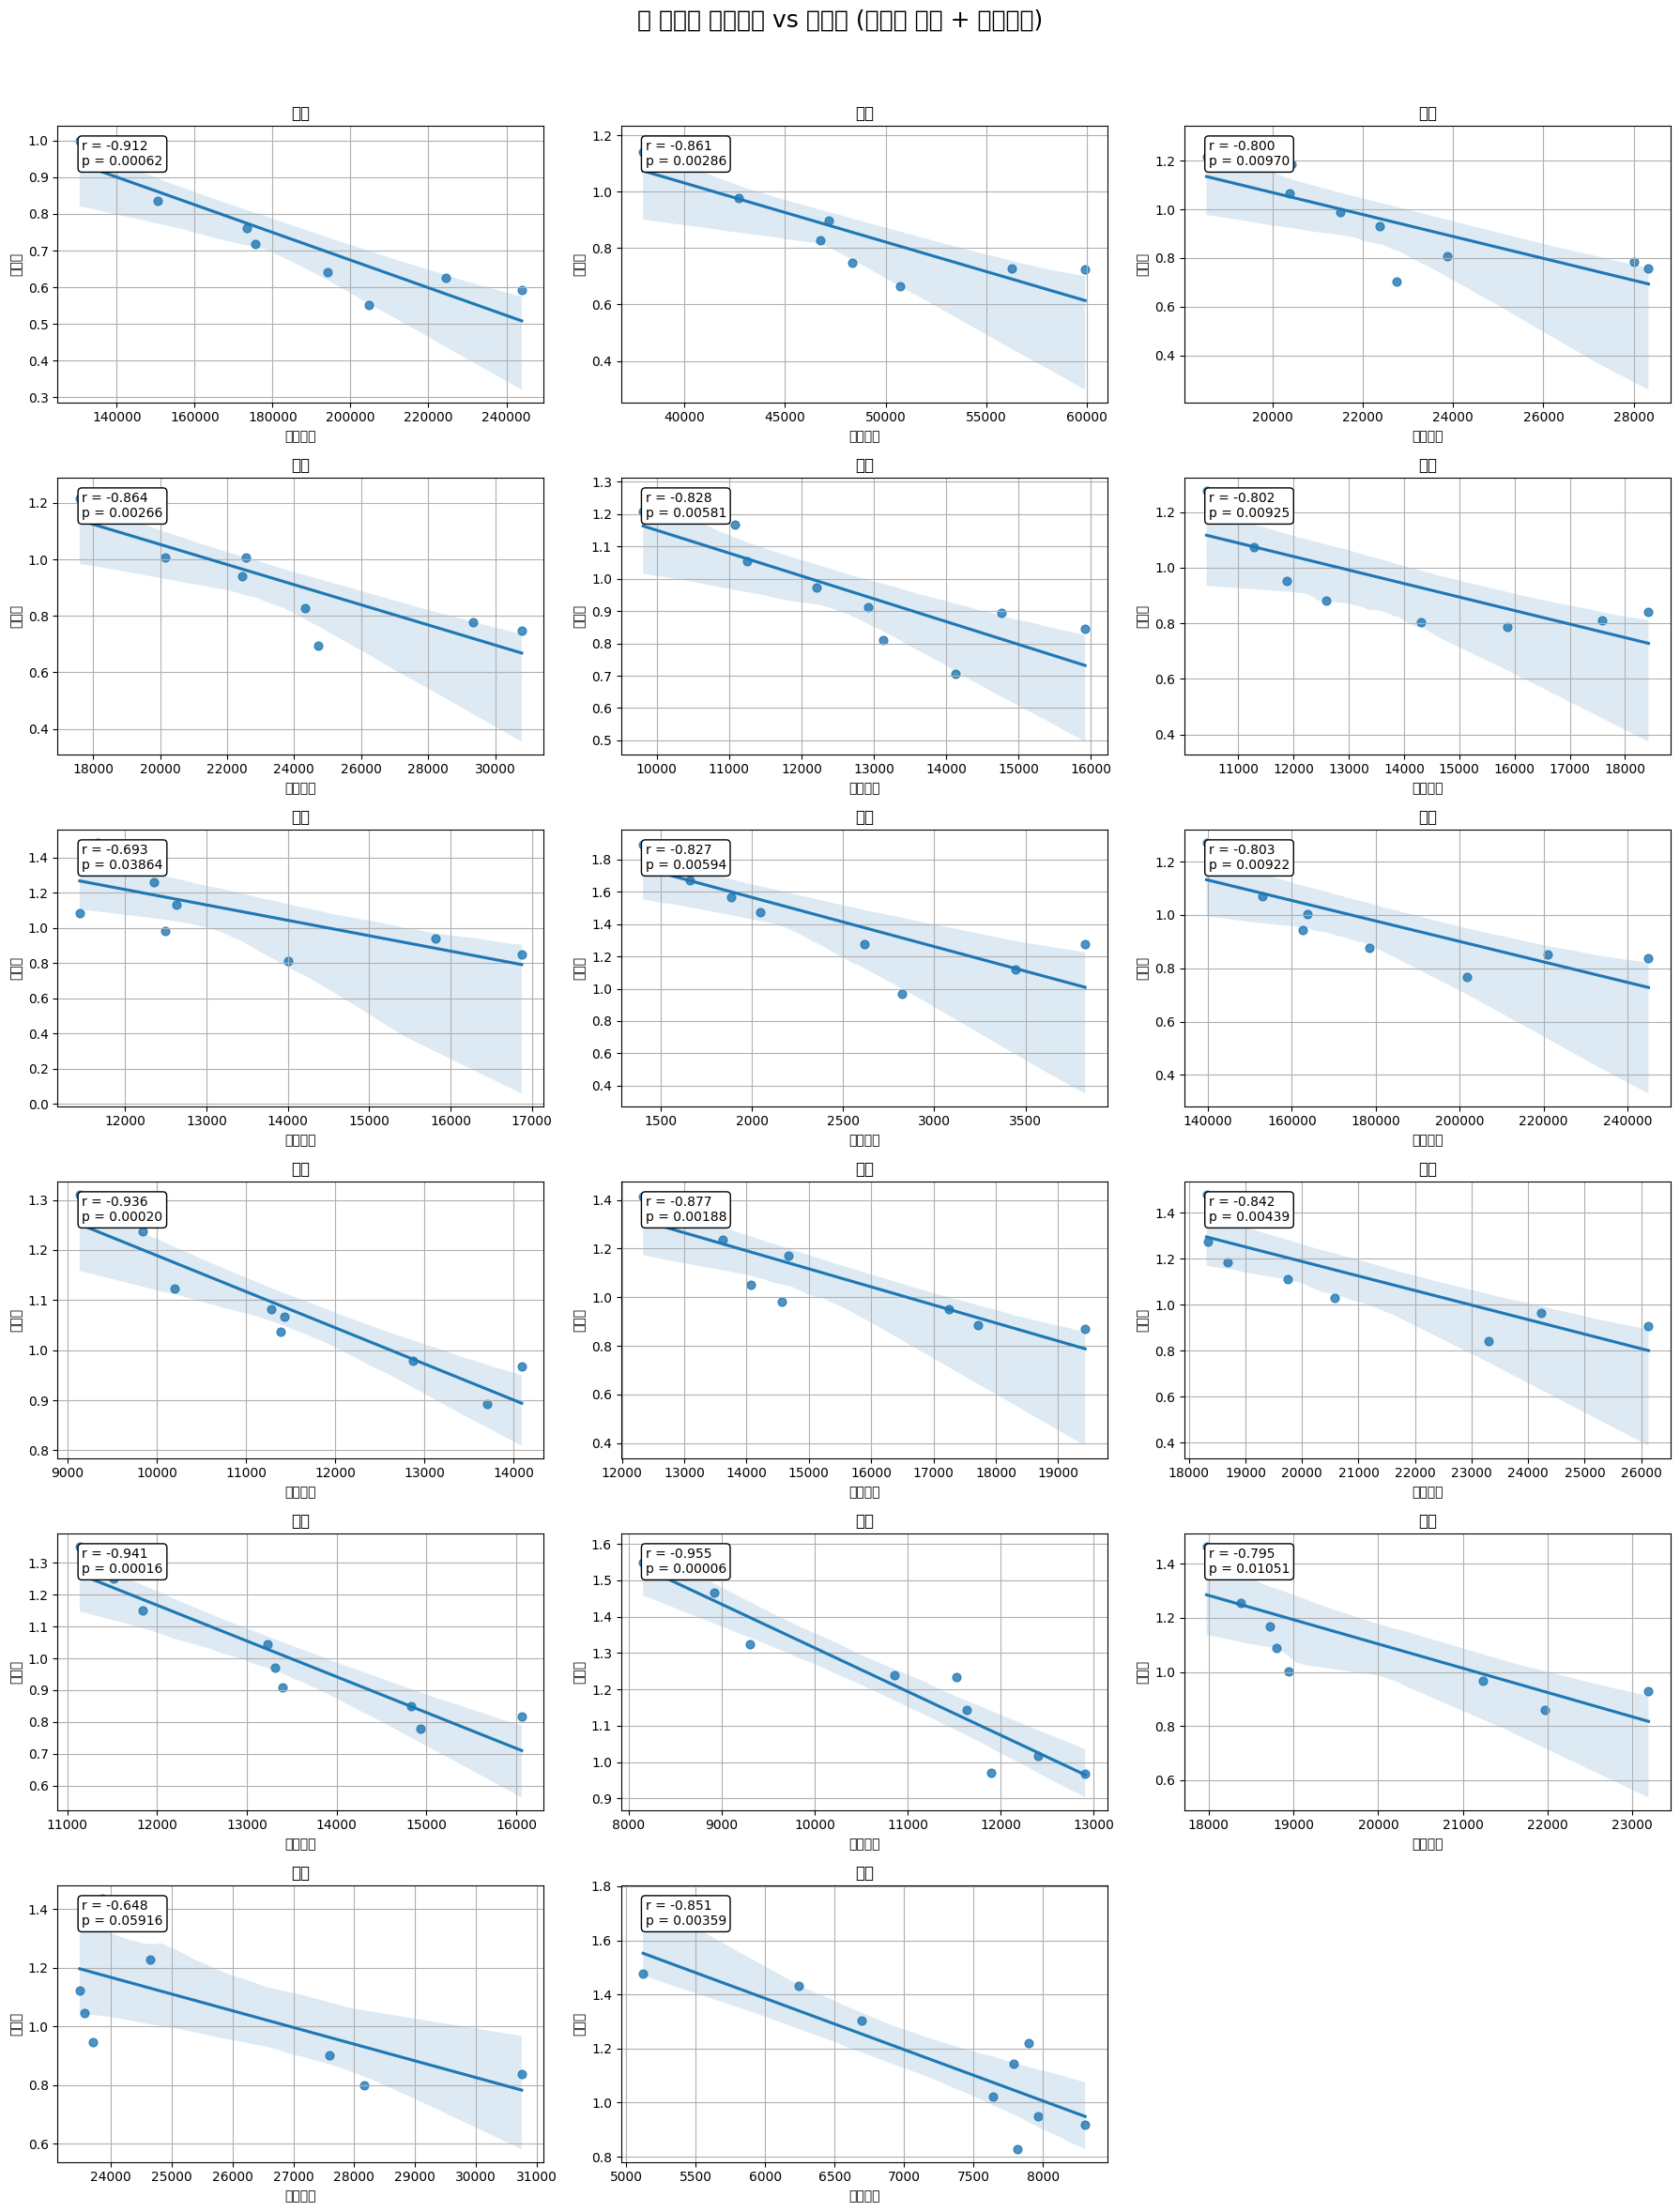

In [3]:
# 📌 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# 📌 2. 파일 업로드 (Google Colab 전용)
from google.colab import files
uploaded = files.upload()

# 📌 3. CSV 파일 불러오기 (한글 인코딩 고려)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, encoding='cp949')

# 📌 4. 지역별 상관계수와 p-value 계산
def region_correlation(region_df):
    region_name = region_df["지역"].iloc[0]
    corr, pval = pearsonr(region_df["전세가격"], region_df["출산율"])
    return {
        "지역": region_name,
        "상관계수": round(corr, 3),
        "p-value": round(pval, 5)
    }

correlation_results = [region_correlation(df[df["지역"] == r]) for r in df["지역"].unique()]
correlation_df = pd.DataFrame(correlation_results).sort_values("p-value")

print("📊 지역별 전세가격과 출산율의 상관관계 분석 결과:")
print(correlation_df)

# 📌 5. 통계적으로 유의하지 않은 지역 출력 (p >= 0.05)
not_significant = correlation_df[correlation_df["p-value"] >= 0.05]
if not not_significant.empty:
    print("\n⚠️ 통계적으로 유의하지 않은 지역 (p >= 0.05):")
    print(not_significant)
else:
    print("\n✅ 모든 지역에서 통계적으로 유의한 상관관계가 관찰됨 (p < 0.05)")

# 📌 6. 지역별 회귀선 포함 산점도 + 상관계수 텍스트 표시
regions = df["지역"].unique()
ncols = 3
nrows = -(-len(regions) // ncols)  # 올림 나눗셈

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
fig.suptitle("📈 지역별 전세가격 vs 출산율 (회귀선 포함 + 상관계수)", fontsize=18)

for idx, region in enumerate(regions):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]

    subset = df[df["지역"] == region]
    sns.regplot(data=subset, x="전세가격", y="출산율", ax=ax, scatter_kws={"s": 40})

    # 상관계수 계산 및 표시
    r, p = pearsonr(subset["전세가격"], subset["출산율"])
    ax.text(0.05, 0.95, f"r = {r:.3f}\np = {p:.5f}",
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))

    ax.set_title(region)
    ax.set_xlabel("전세가격")
    ax.set_ylabel("출산율")
    ax.grid(True)

# 남은 빈칸 subplot 제거
for i in range(len(regions), ncols * nrows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Saving 출산율_전세가_인구수_병합데이터.csv to 출산율_전세가_인구수_병합데이터 (4).csv
📊 지역별 전세가격과 출산율의 상관관계 분석 결과:
    지역   상관계수  p-value
13  전남 -0.955  0.00006
12  전북 -0.941  0.00016
9   강원 -0.936  0.00020
0   서울 -0.912  0.00062
10  충북 -0.877  0.00188
3   인천 -0.864  0.00266
1   부산 -0.861  0.00286
16  제주 -0.851  0.00359
11  충남 -0.842  0.00439
4   광주 -0.828  0.00581
7   세종 -0.827  0.00594
8   경기 -0.803  0.00922
5   대전 -0.802  0.00925
2   대구 -0.800  0.00970
14  경북 -0.795  0.01051
6   울산 -0.693  0.03864
15  경남 -0.648  0.05916

⚠️ 통계적으로 유의하지 않은 지역 (p ≥ 0.05):
    지역   상관계수  p-value
15  경남 -0.648  0.05916


<ipython-input-6-aca46ef2085b>:74: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-6-aca46ef2085b>:74: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-6-aca46ef2085b>:74: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-6-aca46ef2085b>:74: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-6-aca46ef2085b>:74: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-6-aca46ef2085b>:74: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-6-aca46ef2085b>:74

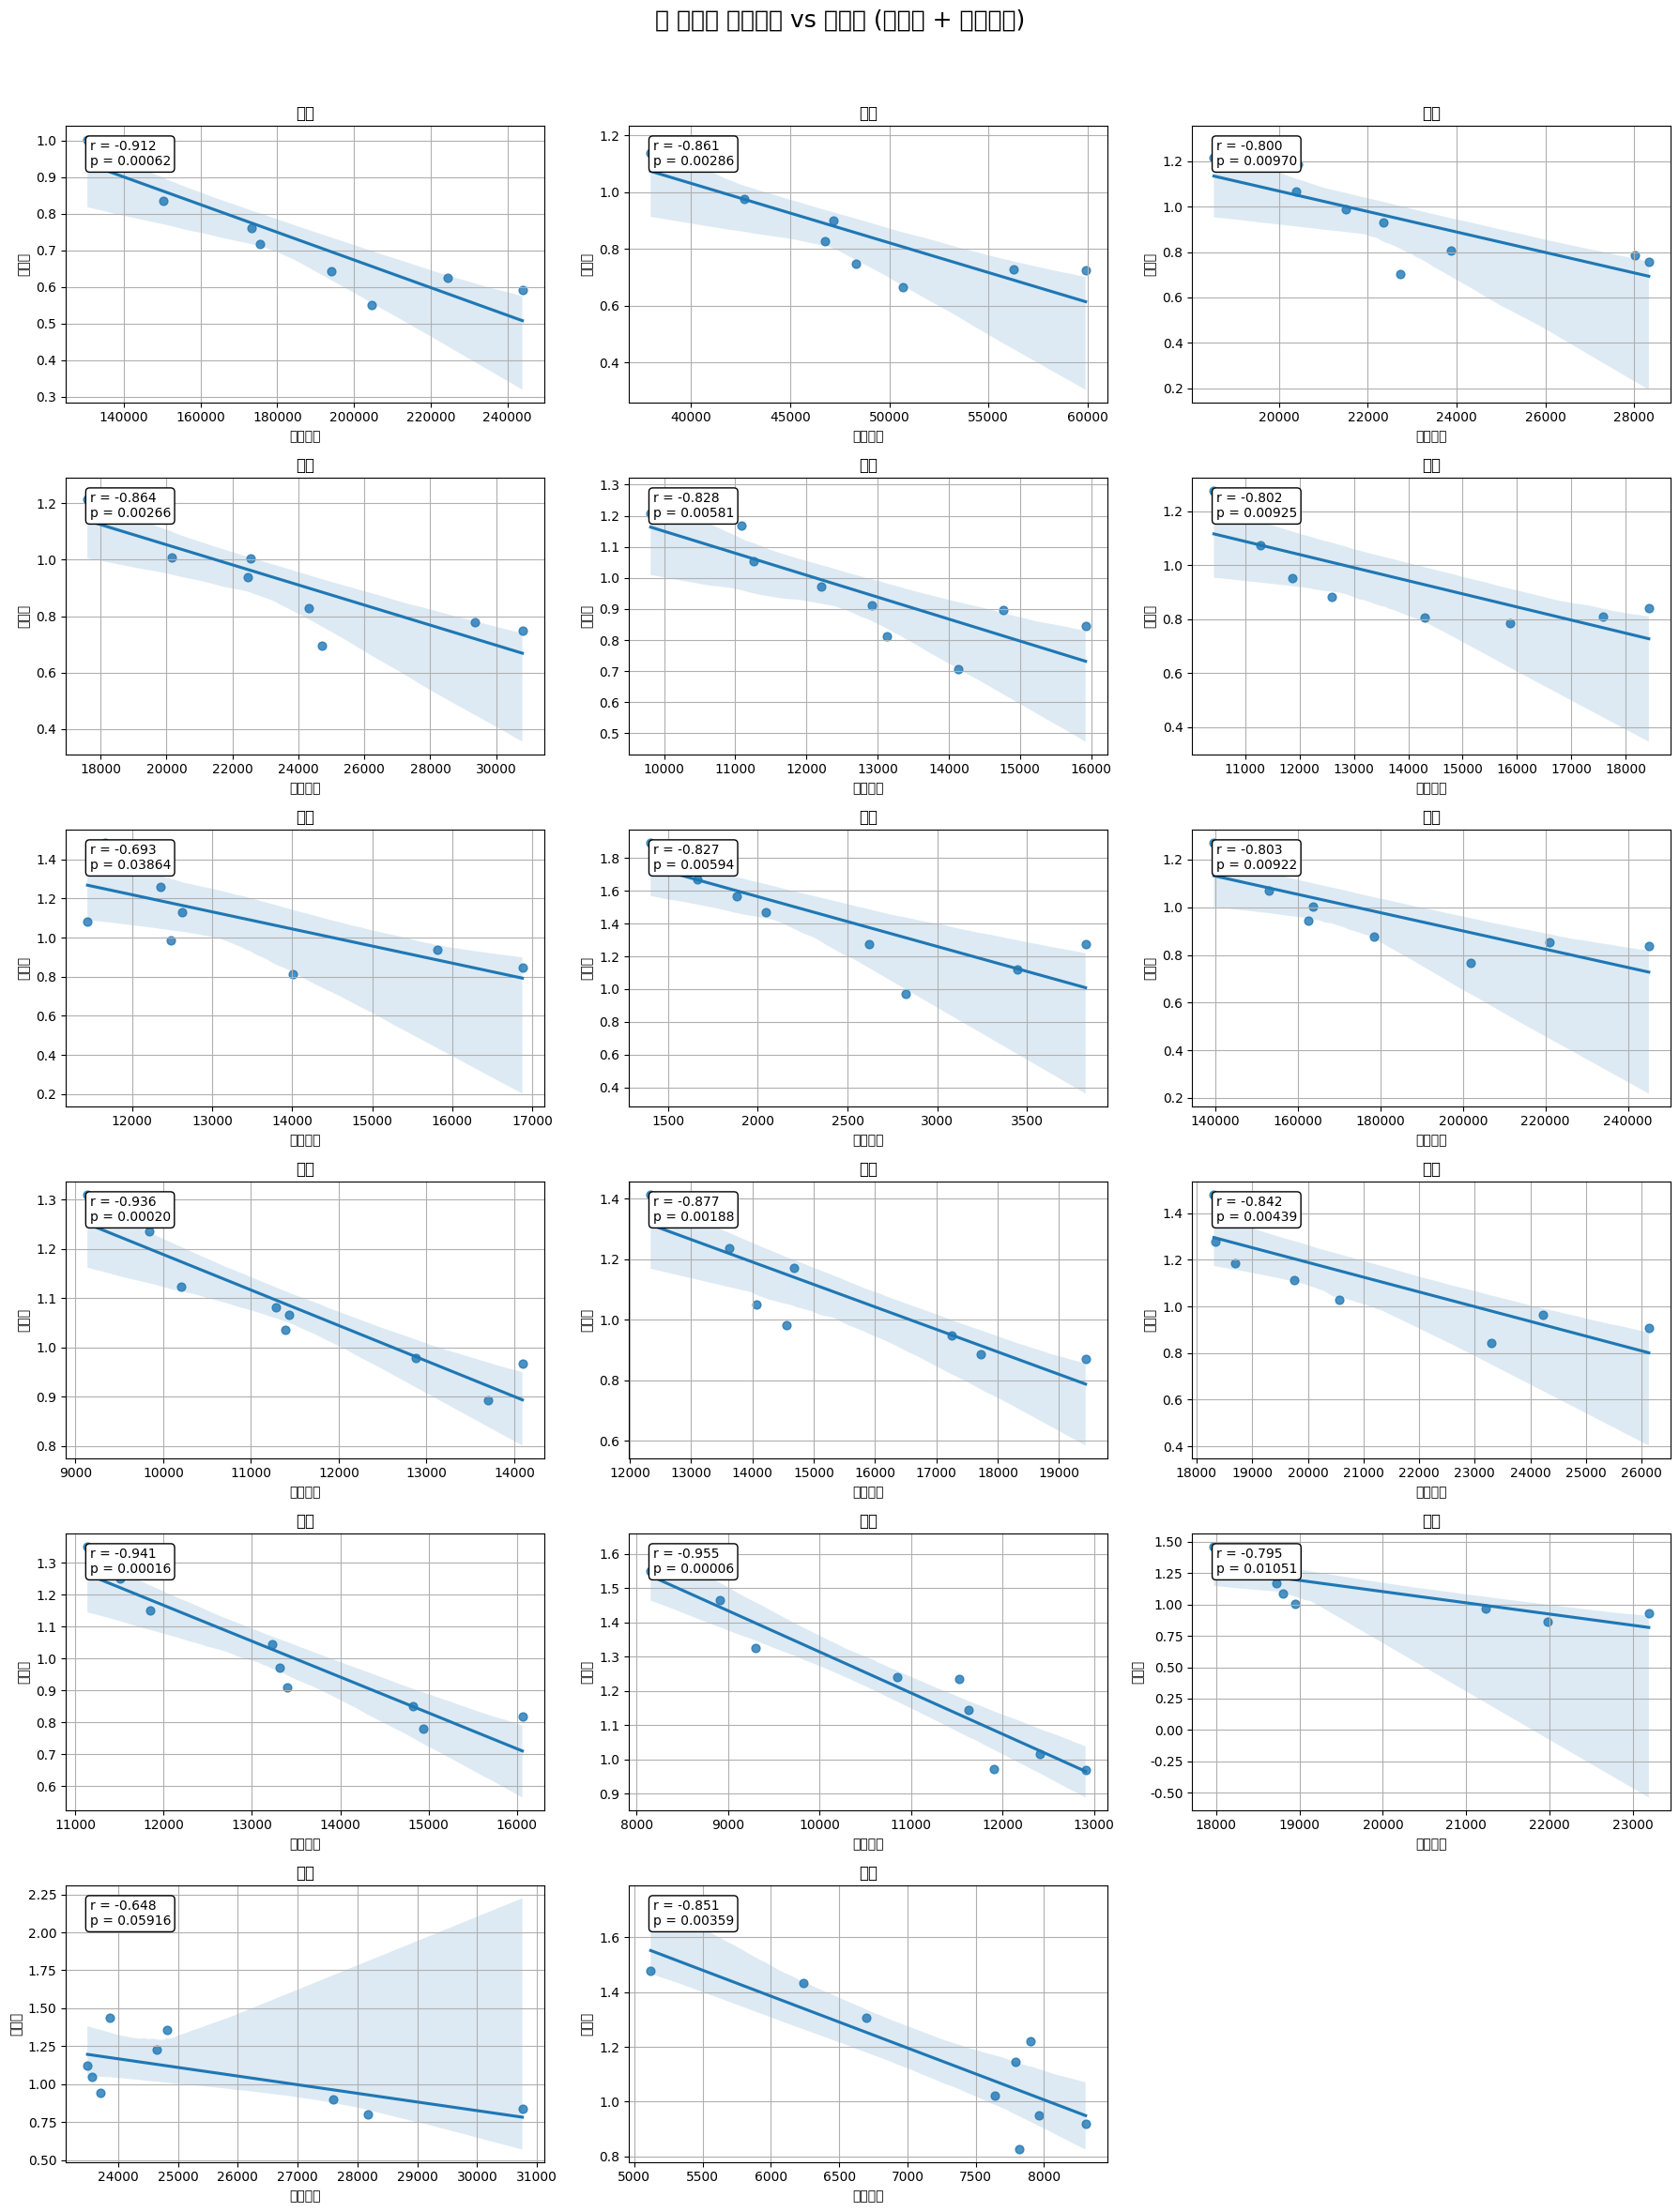


📈 2024년 지역별 전세가격 및 출산율 예측:
    지역  2024예상전세가  2024예상출산율
0   서울     217433      0.608
1   부산      52758      0.764
12  전북      15521      0.771
5   대전      16804      0.807
4   광주      14831      0.809
3   인천      25945      0.841
10  충북      18594      0.850
8   경기     212573      0.853
9   강원      14433      0.869
14  경북      22557      0.874
15  경남      28841      0.892
2   대구      23448      0.913
11  충남      24083      0.930
16  제주       8270      0.955
6   울산      14427      1.007
13  전남      12501      1.014
7   세종       3128      1.222


In [6]:
# ✅ Google Colab 한글 폰트 설정 (1회만 실행하면 됨)
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# 2. 파일 업로드
from google.colab import files
uploaded = files.upload()

# 3. 파일 로딩
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, encoding='cp949')

# 4. 지역별 상관관계 함수
def region_correlation(region_df):
    region_name = region_df["지역"].iloc[0]
    corr, pval = pearsonr(region_df["전세가격"], region_df["출산율"])
    return {
        "지역": region_name,
        "상관계수": round(corr, 3),
        "p-value": round(pval, 5)
    }

correlation_results = [region_correlation(df[df["지역"] == r]) for r in df["지역"].unique()]
correlation_df = pd.DataFrame(correlation_results).sort_values("p-value")

print("📊 지역별 전세가격과 출산율의 상관관계 분석 결과:")
print(correlation_df)

not_significant = correlation_df[correlation_df["p-value"] >= 0.05]
if not not_significant.empty:
    print("\n⚠️ 통계적으로 유의하지 않은 지역 (p ≥ 0.05):")
    print(not_significant)
else:
    print("\n✅ 모든 지역에서 통계적으로 유의한 상관관계가 관찰됨 (p < 0.05)")

# 5. 전 지역 회귀선 포함 산점도
regions = df["지역"].unique()
ncols = 3
nrows = -(-len(regions) // ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
fig.suptitle("📈 지역별 전세가격 vs 출산율 (회귀선 + 상관계수)", fontsize=18)

for idx, region in enumerate(regions):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]

    subset = df[df["지역"] == region]
    sns.regplot(data=subset, x="전세가격", y="출산율", ax=ax, scatter_kws={"s": 40})
    r, p = pearsonr(subset["전세가격"], subset["출산율"])
    ax.text(0.05, 0.95, f"r = {r:.3f}\np = {p:.5f}",
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"))
    ax.set_title(region)
    ax.set_xlabel("전세가격")
    ax.set_ylabel("출산율")
    ax.grid(True)

# 불필요한 subplot 제거
for i in range(len(regions), ncols * nrows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 6. 2024년 전세가격 및 출산율 예측 함수
def forecast_2024(region_df):
    region_df = region_df.sort_values("연도")
    name = region_df["지역"].iloc[0]

    # 전세가 평균 증가율 계산
    region_df["전세가증가율"] = region_df["전세가격"].pct_change()
    avg_growth = region_df["전세가증가율"].mean()

    # 가장 최근 전세가격
    latest_price = region_df[region_df["연도"] == region_df["연도"].max()]["전세가격"].values[0]
    forecast_price = int(latest_price * (1 + avg_growth))

    # 회귀모형 학습 및 예측
    X = region_df["전세가격"].values.reshape(-1, 1)
    y = region_df["출산율"].values
    model = LinearRegression()
    model.fit(X, y)
    forecast_birthrate = model.predict([[forecast_price]])[0]

    return {
        "지역": name,
        "2024예상전세가": forecast_price,
        "2024예상출산율": round(forecast_birthrate, 3)
    }

# 7. 전체 지역 예측 수행
forecast_results = [forecast_2024(df[df["지역"] == r]) for r in df["지역"].unique()]
forecast_df = pd.DataFrame(forecast_results).sort_values("2024예상출산율")

print("\n📈 2024년 지역별 전세가격 및 출산율 예측:")
print(forecast_df)


Saving 출산율_전세가_인구수_병합데이터.csv to 출산율_전세가_인구수_병합데이터 (5).csv
📊 지역별 전세가격과 출산율의 상관관계 분석 결과:
    지역   상관계수  p-value
13  전남 -0.955  0.00006
12  전북 -0.941  0.00016
9   강원 -0.936  0.00020
0   서울 -0.912  0.00062
10  충북 -0.877  0.00188
3   인천 -0.864  0.00266
1   부산 -0.861  0.00286
16  제주 -0.851  0.00359
11  충남 -0.842  0.00439
4   광주 -0.828  0.00581
7   세종 -0.827  0.00594
8   경기 -0.803  0.00922
5   대전 -0.802  0.00925
2   대구 -0.800  0.00970
14  경북 -0.795  0.01051
6   울산 -0.693  0.03864
15  경남 -0.648  0.05916


<ipython-input-7-4c7a66fca07a>:63: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-4c7a66fca07a>:63: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-4c7a66fca07a>:63: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-4c7a66fca07a>:63: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-4c7a66fca07a>:63: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-4c7a66fca07a>:63: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
<ipython-input-7-4c7a66fca07a>:63

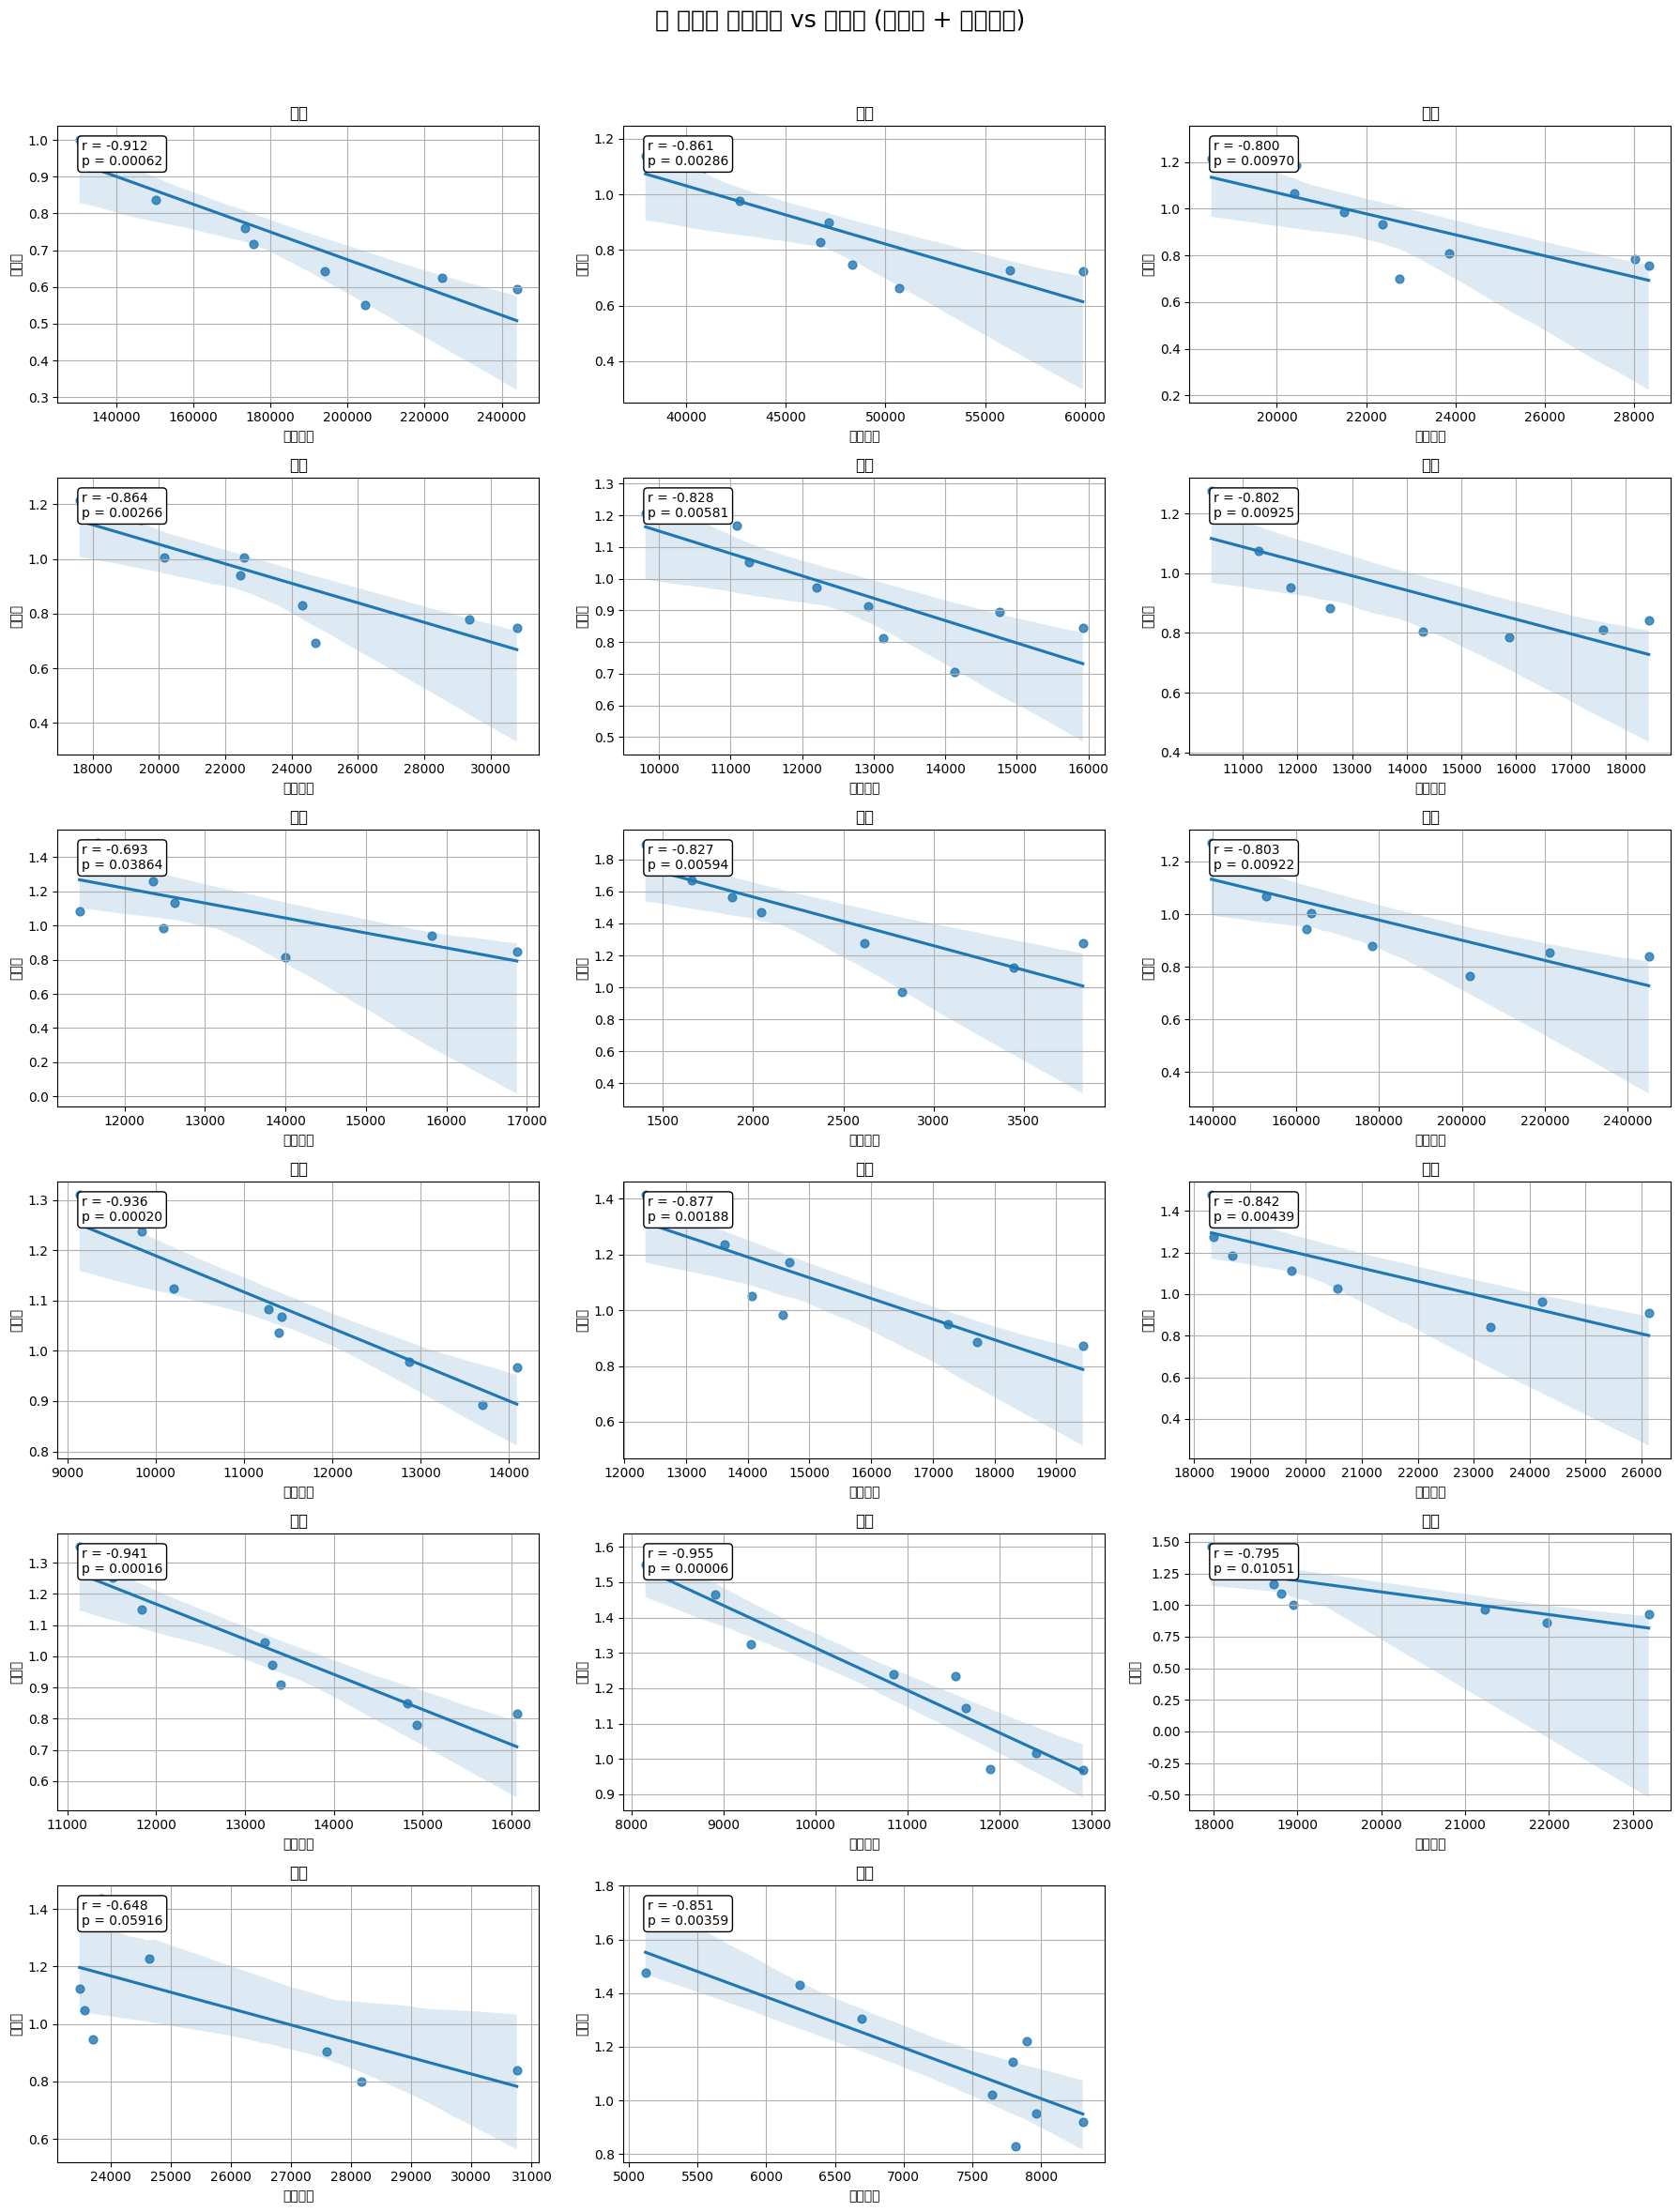

In [7]:
# ✅ STEP 1. 한글 폰트 설치 및 설정
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ✅ STEP 2. 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# ✅ STEP 3. CSV 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, encoding='cp949')

# ✅ STEP 4. 지역별 상관계수와 p-value 계산
def region_correlation(region_df):
    name = region_df["지역"].iloc[0]
    corr, pval = pearsonr(region_df["전세가격"], region_df["출산율"])
    return {"지역": name, "상관계수": round(corr, 3), "p-value": round(pval, 5)}

correlation_df = pd.DataFrame([
    region_correlation(df[df["지역"] == r])
    for r in df["지역"].unique()
]).sort_values("p-value")

print("📊 지역별 전세가격과 출산율의 상관관계 분석 결과:")
print(correlation_df)

# ✅ STEP 5. 회귀선 포함 산점도 + 상관계수 표시
regions = df["지역"].unique()
ncols = 3
nrows = -(-len(regions) // ncols)  # 올림 나눗셈

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
fig.suptitle("📈 지역별 전세가격 vs 출산율 (회귀선 + 상관계수)", fontsize=18)

for idx, region in enumerate(regions):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]

    subset = df[df["지역"] == region]
    sns.regplot(data=subset, x="전세가격", y="출산율", ax=ax, scatter_kws={"s": 40})
    r, p = pearsonr(subset["전세가격"], subset["출산율"])
    ax.text(0.05, 0.95, f"r = {r:.3f}\np = {p:.5f}",
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round", fc="white", ec="black"))
    ax.set_title(region)
    ax.set_xlabel("전세가격")
    ax.set_ylabel("출산율")
    ax.grid(True)

for i in range(len(regions), ncols * nrows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Saving 출산율_전세가_인구수_병합데이터.csv to 출산율_전세가_인구수_병합데이터 (6).csv
📊 지역별 전세가격과 출산율의 상관관계 분석 결과:
    지역   상관계수  p-value
13  전남 -0.955  0.00006
12  전북 -0.941  0.00016
9   강원 -0.936  0.00020
0   서울 -0.912  0.00062
10  충북 -0.877  0.00188
3   인천 -0.864  0.00266
1   부산 -0.861  0.00286
16  제주 -0.851  0.00359
11  충남 -0.842  0.00439
4   광주 -0.828  0.00581
7   세종 -0.827  0.00594
8   경기 -0.803  0.00922
5   대전 -0.802  0.00925
2   대구 -0.800  0.00970
14  경북 -0.795  0.01051
6   울산 -0.693  0.03864
15  경남 -0.648  0.05916


<ipython-input-8-c4d5935fee28>:68: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


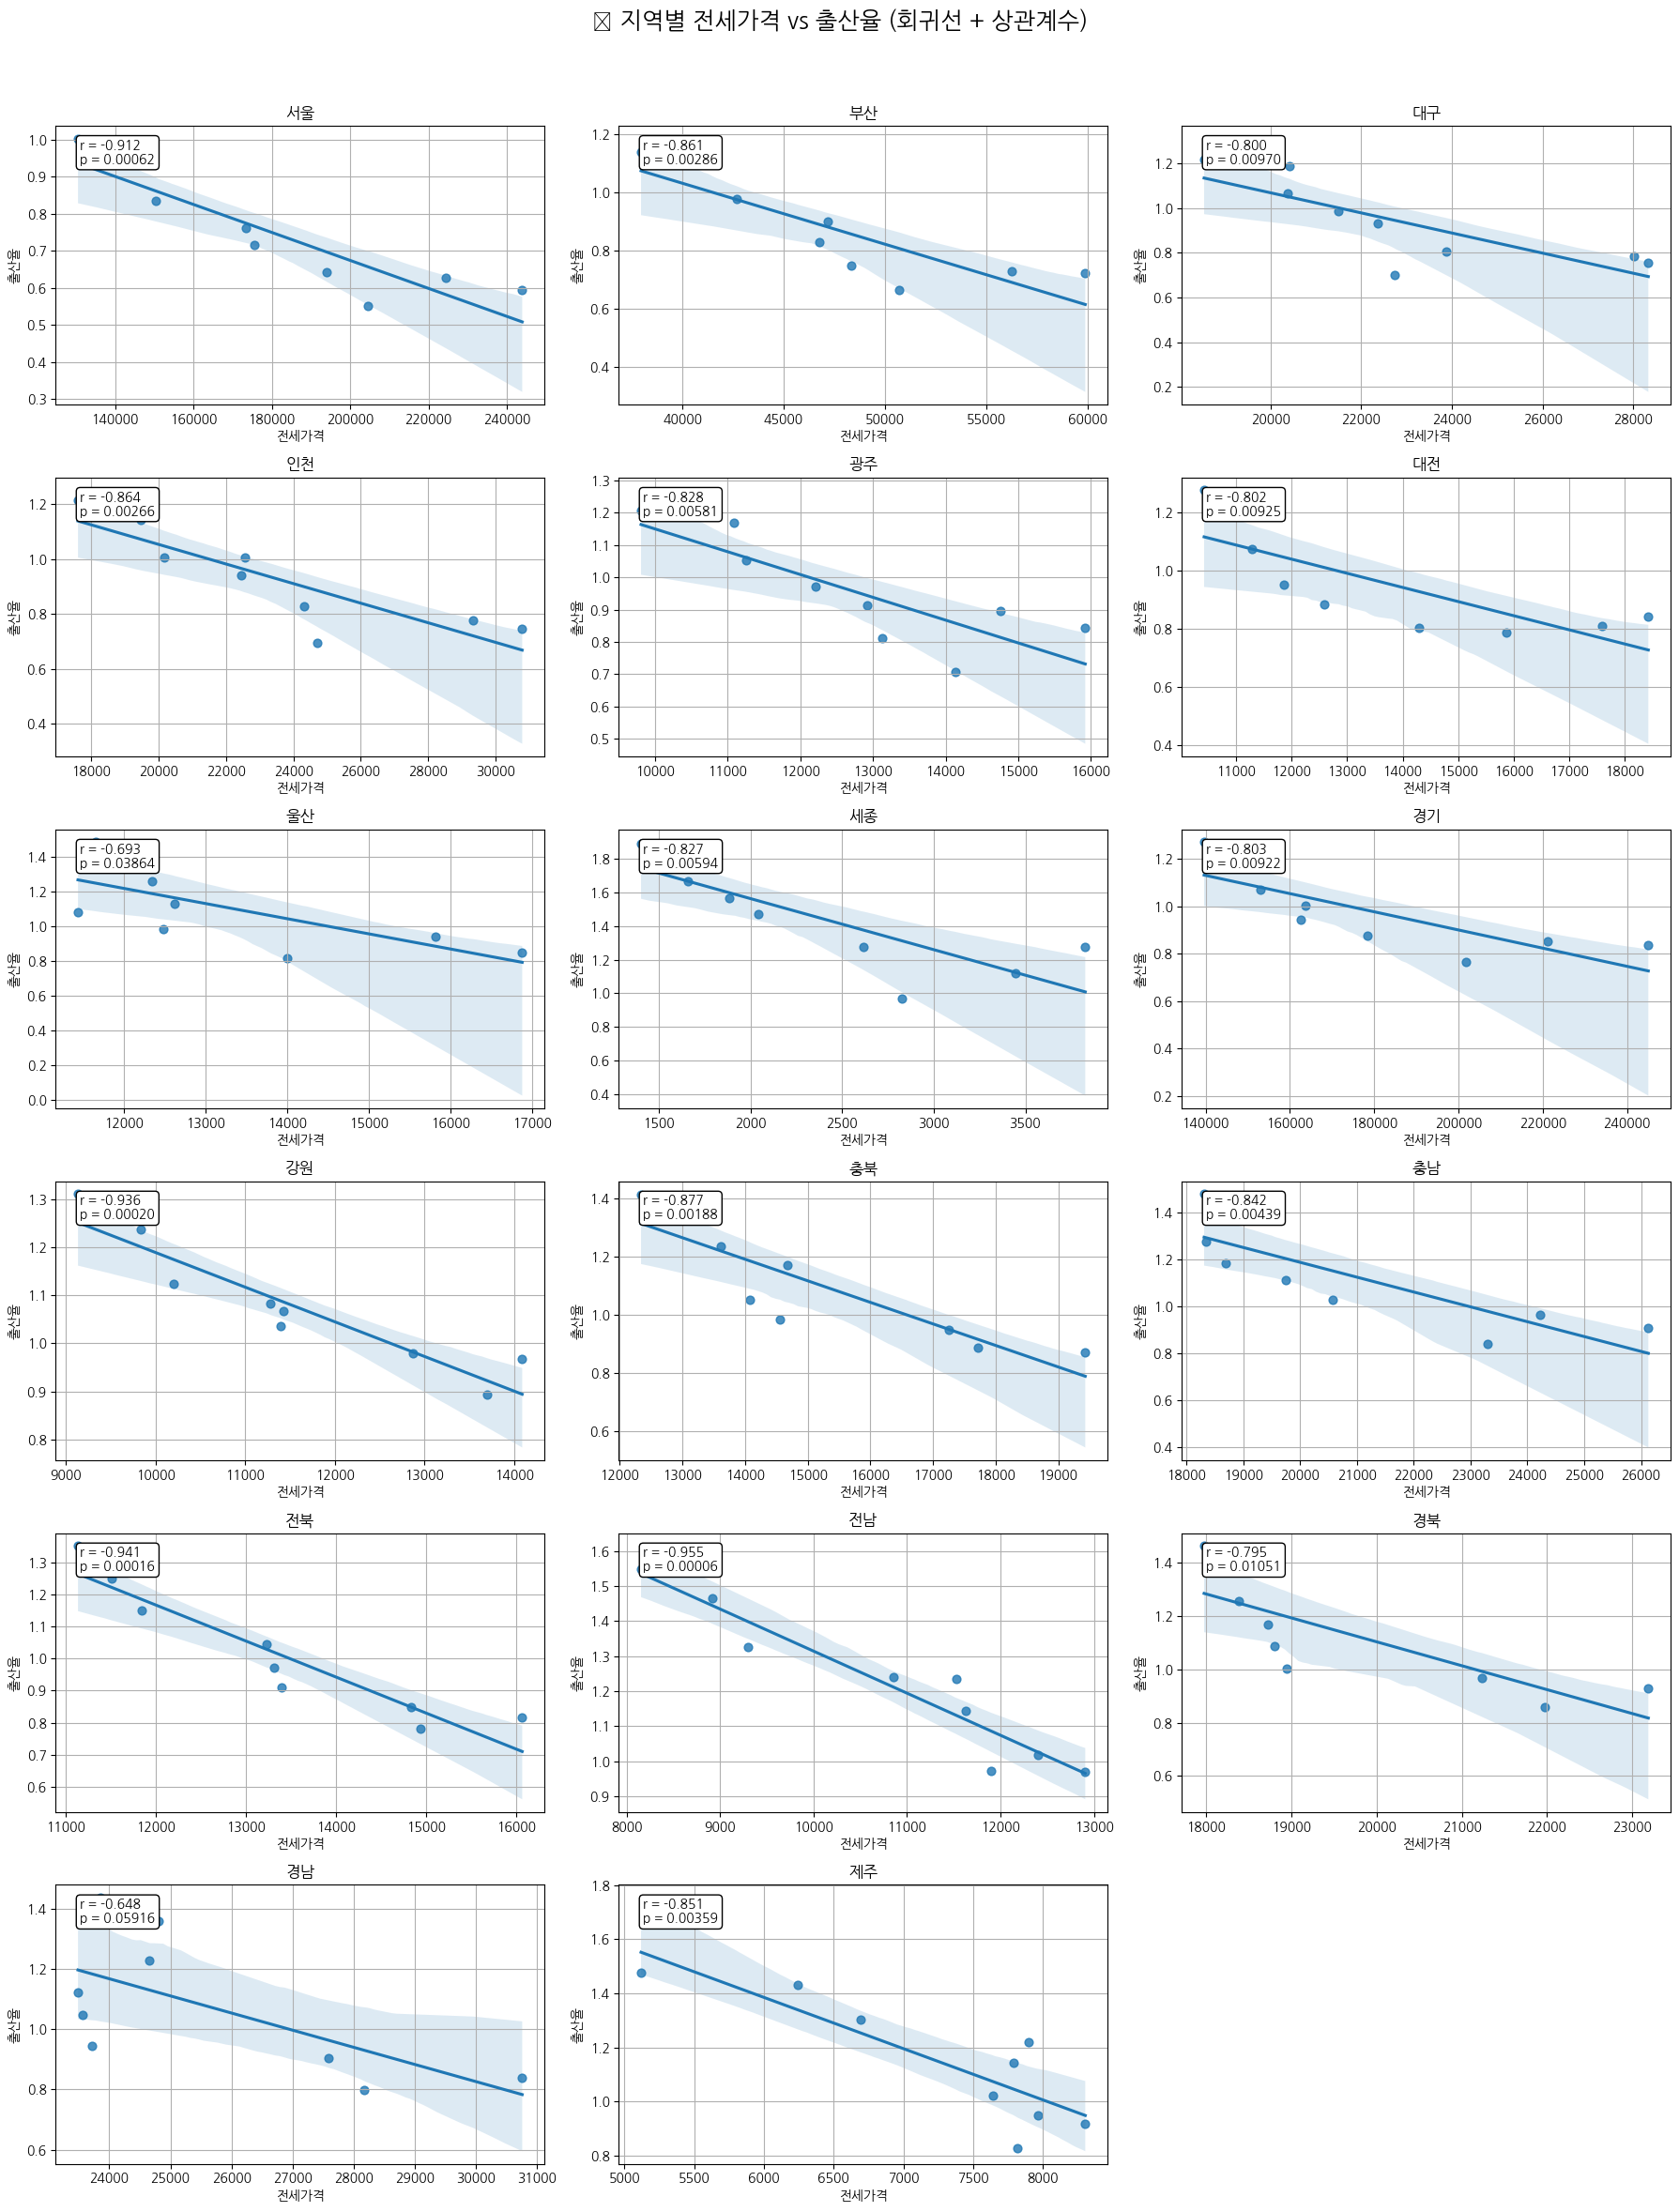

In [8]:
# ✅ STEP 1: 한글 폰트 설치 및 강제 적용
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 나눔고딕 경로 확인 후 직접 지정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ✅ STEP 2: 분석에 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# ✅ STEP 3: 파일 업로드 및 읽기
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, encoding='cp949')

# ✅ STEP 4: 지역별 상관계수 & p-value 계산 함수
def region_correlation(region_df):
    name = region_df["지역"].iloc[0]
    corr, pval = pearsonr(region_df["전세가격"], region_df["출산율"])
    return {"지역": name, "상관계수": round(corr, 3), "p-value": round(pval, 5)}

correlation_df = pd.DataFrame([
    region_correlation(df[df["지역"] == r])
    for r in df["지역"].unique()
]).sort_values("p-value")

print("📊 지역별 전세가격과 출산율의 상관관계 분석 결과:")
print(correlation_df)

# ✅ STEP 5: 시각화 – 회귀선 포함 산점도 + 상관계수 표시
regions = df["지역"].unique()
ncols = 3
nrows = -(-len(regions) // ncols)  # 올림 나눗셈

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
fig.suptitle("📈 지역별 전세가격 vs 출산율 (회귀선 + 상관계수)", fontsize=18)

for idx, region in enumerate(regions):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]

    subset = df[df["지역"] == region]
    sns.regplot(data=subset, x="전세가격", y="출산율", ax=ax, scatter_kws={"s": 40})
    r, p = pearsonr(subset["전세가격"], subset["출산율"])
    ax.text(0.05, 0.95, f"r = {r:.3f}\np = {p:.5f}",
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle="round", fc="white", ec="black"))
    ax.set_title(region, fontsize=12)
    ax.set_xlabel("전세가격")
    ax.set_ylabel("출산율")
    ax.grid(True)

# 빈 subplot 제거
for i in range(len(regions), ncols * nrows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
